# Problem Statement

**A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue.<br>In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people,
Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.**

- The company wants to know:
    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

##### importing statsmodels library

In [2]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

##### importing sklearn library

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [4]:
import warnings
warnings.filterwarnings("ignore")

## Reading data

In [5]:
raw_data = pd.read_csv("day.csv")

In [6]:
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",raw_data.shape[0])
#pd.set_option("display.float_format", lambda x : "%.3f" %x)

In [7]:
raw_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
raw_data.shape

(730, 16)

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


-  we have **no null values** to deal with.
- Variables $"season", "mth", "weathersit"$ are in int datatype we have to convert it accordingly for further analysis.

In [10]:
# Cross checking the null values
raw_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# Checking for duplicate records

raw_data.duplicated().sum()

0

In [12]:
raw_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- variables like $"temp", "atemp", "hum", "windspeed", "registered", "cnt"$ have the very similar mean and meadian values, which also indicates that these variables are not skewed much. and the outliers are trival in these variables. 

## Data Understanding

In [13]:
num_vars = ["temp","atemp","hum","windspeed","casual","registered","cnt"]

In [14]:
corr =  raw_data[num_vars].corr()
corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


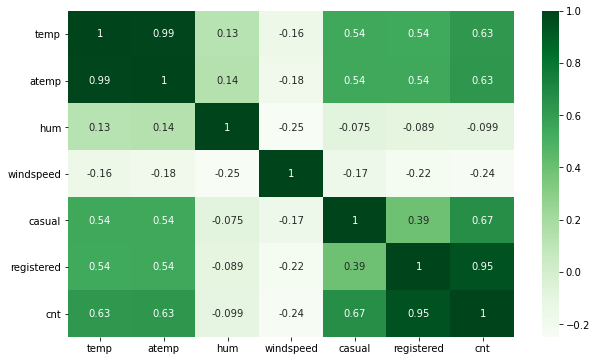

In [15]:
plt.figure(figsize = (10,6))
sns.heatmap(corr,cmap = "Greens",annot = True)
plt.show()

- variable "registered" is highly correlated with the target variable $"cnt"$ 
- The variables $"casual", "atemp" and "temp"$ are almost equally correlated with target variable $"cnt"$

-  We can observe a tremndous correlation value of 0.99 between variables $"temp" and "atemp"$, So definitely this is a clear sign of **Multicollinearity** we have to definitely drop any one variable.

**Checking for linear relation among highly correlated variables**

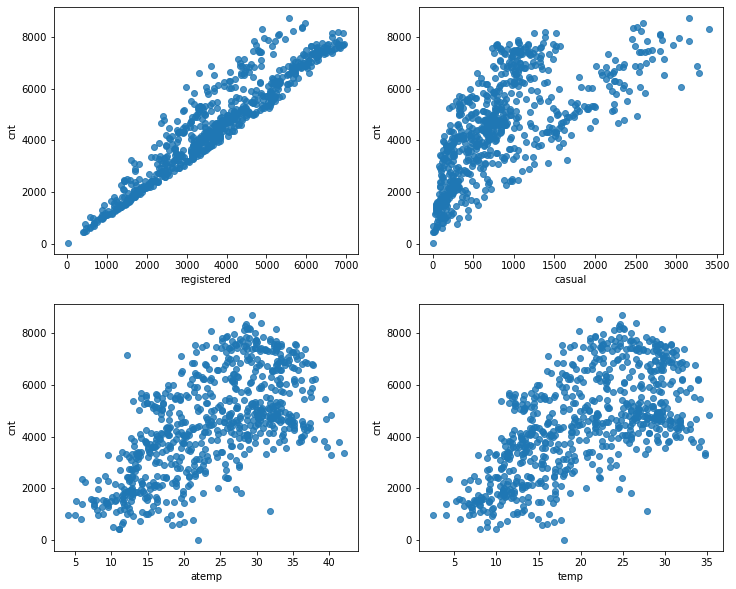

In [16]:
plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
sns.regplot(raw_data["registered"], raw_data["cnt"], fit_reg = False)


plt.subplot(2,2,2)
sns.regplot(raw_data["casual"], raw_data["cnt"], fit_reg = False)

plt.subplot(2,2,3)
sns.regplot(raw_data["atemp"], raw_data["cnt"], fit_reg = False)

plt.subplot(2,2,4)
sns.regplot(raw_data["temp"], raw_data["cnt"], fit_reg = False)

plt.show()

-  This clearly shows these variables have a positive trend and undergo a linear correlation with target variable.
-  Thus confirms as the potential variable for the model building.

### Checking for any sign of relationship between categorical variables and target variable "cnt" 

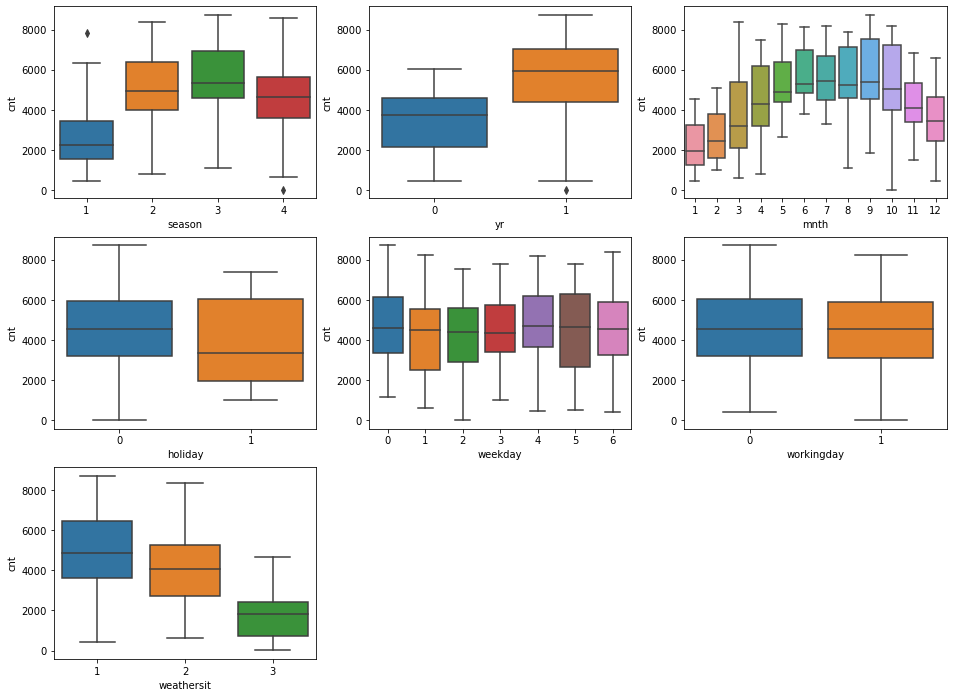

In [17]:
plt.figure(figsize = [16,12])

plt.subplot(3,3,1)
sns.boxplot(x = "season", y = "cnt", data = raw_data)

plt.subplot(3,3,2)
sns.boxplot(x = "yr", y = "cnt", data = raw_data)

plt.subplot(3,3,3)
sns.boxplot(x = "mnth", y = "cnt", data = raw_data)

plt.subplot(3,3,4)
sns.boxplot(x = "holiday", y = "cnt", data = raw_data)

plt.subplot(3,3,5)
sns.boxplot(x = "weekday", y = "cnt", data = raw_data)

plt.subplot(3,3,6)
sns.boxplot(x = "workingday", y = "cnt", data = raw_data)

plt.subplot(3,3,7)
sns.boxplot(x = "weathersit", y = "cnt", data = raw_data)

plt.show()

-  Except $"weekday" and "workingday"$ everyother category has noticible influence over the target variable.

## Data preparation

##### variable "atemp"

-  As variable $"temp" and "atemp"$ are highly correlated with eachother it becomes a redundant variable in terms  of model building.So we can drop any one variable. 
-  Here Iam **dropping variable "atemp"**

In [18]:
raw_data = raw_data.drop(["atemp"], axis = 1)

In [19]:
raw_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,82,1518,1600


In [20]:
raw_data.instant.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

-  **It is clear that the variale instance is just a serial number for the records and doesn't have any analytical purpose in this model building, So we can drop $"instance"$ variable.**

In [21]:
raw_data.drop(["instant"],axis = 1,inplace = True)

##### variable "dteday"

- This variable is indicating the date of the data, As we have a seperate variable $"yr"$ which is indicating the year as 2018 or 2019, and a seperate variable $"mnth"$ which is indicating the month for the data and a seperate variable $"season"$ which is indicating the season of the data we can definitely drop the variable $"dteday"$.

In [22]:
raw_data = raw_data.drop(["dteday"], axis = 1)

In [23]:
raw_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,82,1518,1600


##### variable "season"

In [24]:
raw_data.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

-  As per the data dictionary each of these numbers represents a specific season of the year, So for better analysis purpose we have to convert this variable into categorical variable and later we can create dummy variables according to their respective character levels.

In [25]:
raw_data["season"] = raw_data["season"].map({1 : "spring", 2 : "summer", 3 : "fall", 4 : "winter"})

In [26]:
# cross checking the variable that we have mapped.

raw_data["season"].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [27]:
raw_data["season"].dtype

dtype('O')

##### variable "yr"

In [28]:
raw_data["yr"].value_counts()

1    365
0    365
Name: yr, dtype: int64

-  Here the year $2018 & 2019$ have be **encoded as 1 and 0** it is adviseable to convert it to seperate categories, for building better model

In [29]:
raw_data["yr"] = raw_data["yr"].map({1 : "2019", 0 : "2018"})

In [30]:
# cross checking the variable that we have mapped.

raw_data["yr"].value_counts()

2019    365
2018    365
Name: yr, dtype: int64

##### variable "mnth"

In [31]:
raw_data["mnth"].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

-  According to the data dictionary these numbers represent the months of the year, so building model by keeping, these as integers will add no meaning to the data so we are converting these to categorical variables with categories as their respective months.<br><br>
- later we can create dummy variables for these categories.

In [32]:
 months_dict = {1 : "jan", 2 : "feb", 3 : "mar", 4 : "apr", 5 : "may", 6 : "jun", 
                7 : "jul", 8 : "aug", 9 : "sep", 10 : "oct", 11 : "nov", 12 : "dec"}  

In [33]:
raw_data["mnth"] = raw_data["mnth"].map(months_dict)

In [34]:
# cross checking the variable that we have mapped.

raw_data["mnth"].value_counts()

may    62
jul    62
jan    62
oct    62
mar    62
dec    62
aug    62
nov    60
sep    60
apr    60
jun    60
feb    56
Name: mnth, dtype: int64

In [35]:
raw_data["mnth"].dtype

dtype('O')

##### variable "holiday"

In [36]:
raw_data["holiday"].value_counts()

0    709
1     21
Name: holiday, dtype: int64

-  It is perfect for analysis

##### variable "weekday"

In [37]:
raw_data["weekday"].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

-  As mentioned in the data dictionary variable $"weekday"$ is representing the days of the week so keeping them as integers adds no value in terms of model building. So converting them to categorical variables.


In [38]:
 week_dict = {0 : "Sun", 1 : "Mon", 2 : "Tue", 3 : "Wed", 4 : "Thr", 5 : "Fri", 6 : "Sat"}

In [39]:
raw_data["weekday"] = raw_data["weekday"].map(week_dict)

In [40]:
# cross checking the data type of the variable "weekend", It has been perfectly changed to object data type.

raw_data["weekday"].dtype

dtype('O')

##### variable "workingday"

In [41]:
raw_data["workingday"].value_counts()

1    504
0    226
Name: workingday, dtype: int64

-  It is perfect for analysis

##### variable "weathersit"

In [42]:
raw_data["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

- As per the data dictionary they have grouped certain weather conditions together and **encoded as 1,2,3 so lets convert this variable to a categorical variable** for the purpose of model building.

In [43]:
raw_data["weathersit"] = raw_data["weathersit"].astype("object")

In [44]:
# cross checking the data type of the variable "weathersit", It has been perfectly changed to object data type.

raw_data["weathersit"].dtype

dtype('O')

##### variable "casual" & "registered"

-  As our target variable is just the count of these two variables, **Keeping these variables for model building will explain all the variance** in the target variable and which is not reliable.
-  And our business problem wants to find the driving variables to boost their business after the lift of lockdown we have to focus more on driving variables.
-  We are droping both $"casual" and "registered"$ variables.

In [45]:
raw_data.drop(["casual", "registered"], axis = 1, inplace = True)

In [46]:
raw_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,jan,0,Mon,1,2,14.110847,80.5833,10.749882,985
1,spring,2018,jan,0,Tue,1,2,14.902598,69.6087,16.652113,801
2,spring,2018,jan,0,Wed,1,1,8.050924,43.7273,16.636703,1349
3,spring,2018,jan,0,Thr,1,1,8.200000,59.0435,10.739832,1562
4,spring,2018,jan,0,Fri,1,1,9.305237,43.6957,12.522300,1600


### creating dummy variables for categorical variables

In [47]:
cat_var = raw_data.select_dtypes(exclude = ["int64", "float64"])
cat_var.columns

Index(['season', 'yr', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [48]:
dum_df = pd.get_dummies(raw_data[cat_var.columns], drop_first = True)

In [49]:
dum_df.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_2,weathersit_3
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
dum_df.shape

(730, 23)

-  So we have 23 dummy variables now

##### concating the dum_df & raw_data and droping the categorical variables

In [51]:
bike_data = pd.concat([raw_data, dum_df], axis = 1)

In [52]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_2,weathersit_3
0,spring,2018,jan,0,Mon,1,2,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,spring,2018,jan,0,Tue,1,2,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,spring,2018,jan,0,Wed,1,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,spring,2018,jan,0,Thr,1,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,spring,2018,jan,0,Fri,1,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
bike_data.shape

(730, 34)

In [54]:
bike_data.drop(cat_var.columns, axis = 1, inplace = True)

In [55]:
bike_data.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_2,weathersit_3
0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
bike_data.shape

(730, 29)

-  Totally we have 29 columns.

## Now the Data is ready for model building

### Creating train and test data

In [57]:
df_train, df_test = train_test_split(bike_data, test_size = 0.3, random_state = 100)

In [58]:
print(df_train.shape)

print(df_test.shape)

(511, 29)
(219, 29)


## Scaling the variables

-  **As the business problem seeks to find the major driver factors that determine the count of their Bikes, we would require to interpret the coefficients of the model.**
-  **So the best way is to scale the variables in a common scale.**

In [59]:
scaler = MinMaxScaler()

In [60]:
num_var_scale = ["temp", "hum", "windspeed", "cnt"]

In [61]:
df_train[num_var_scale] = scaler.fit_transform(df_train[num_var_scale])

In [62]:
# Cross checking the scaled variables

df_train.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_2,weathersit_3
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.025440,0.712329,0.537386,0.650333,0.320844,0.514186,0.242661,0.246575,0.248532,0.508806,0.095890,0.084149,0.066536,0.088063,0.076321,0.076321,0.097847,0.084149,0.086106,0.086106,0.080235,0.154599,0.129159,0.136986,0.142857,0.152642,0.136986,0.344423,0.029354
std,0.157613,0.453121,0.225640,0.145741,0.169639,0.224737,0.429112,0.431440,0.432585,0.500412,0.294729,0.277883,0.249461,0.283664,0.265771,0.265771,0.297399,0.277883,0.280795,0.280795,0.271923,0.361876,0.335704,0.344170,0.350270,0.359994,0.344170,0.475645,0.168963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.341151,0.538858,0.199179,0.356765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542077,0.653499,0.298098,0.519673,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.754401,0.414438,0.688737,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


-  The **min and max** values shows that all the numerical variables have been **perfectly scaled between 0 and 1.**

## Model Building

In [63]:
X_train = df_train.drop(["cnt"], axis = 1, inplace = False)
y_train = df_train["cnt"]

In [64]:
lm = LinearRegression()

In [65]:
# Initial training of the model with all the features.

lm.fit(X_train,y_train)

LinearRegression()

In [66]:
lm.coef_

array([-0.1346668 , -0.05880306,  0.44017019, -0.1584349 , -0.18254006,
       -0.0404296 ,  0.04650533,  0.11243816,  0.23156815,  0.02748809,
       -0.04411183, -0.03733997, -0.0641865 , -0.02824564,  0.00848577,
        0.0009092 ,  0.02490114, -0.03922133,  0.00864634,  0.09123286,
       -0.0248306 , -0.05458598, -0.04835519,  0.00402563, -0.02625504,
       -0.00875166, -0.05812072, -0.25074256])

In [67]:
lm.intercept_

0.3905081536952264

-  **So the model has learnt the coefficients for all the variables, as well as the intercept.**

## Obtaining the top 15 features using RFE ( Coarse tuning )

$$**NOTE**$$
-  **I have selected the top 15 features after many trial and error menthod for choosing the potential number of features for building optimal model.**

In [68]:
# Automated feature selection using Recursive Feature Elimination

rfe = RFE(lm, 15)

In [69]:
rfe = rfe.fit(X_train, y_train)

In [70]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_aug', False, 9),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 12),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 8),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 11),
 ('mnth_sep', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Thr', False, 13),
 ('weekday_Tue', False, 6),
 ('weekday_Wed', False, 10),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [71]:
# Filtering only the top 10 features obtained by RFE (Coarse tuning)

new_col = X_train.columns[rfe.support_]
new_col

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_dec', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sep', 'weathersit_2', 'weathersit_3'],
      dtype='object')

## Manual feature elimination ( Fine Tuning )

#### building the model using statsmodels for a detailed statistics summary

In [72]:
X_train = X_train[new_col]

In [73]:
X_train_sm = sm.add_constant(X_train)

In [74]:
lr_sm = sm.OLS(y_train, X_train_sm).fit()

In [75]:
lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     180.1
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          2.29e-189
Time:                        18:01:49   Log-Likelihood:                 514.84
No. Observations:                 511   AIC:                            -997.7
Df Residuals:                     495   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3206      0.036      8.882      0.000       0.250       0.392
holiday          -0.0912      0.026     -3.558      0.000      -0.142      -0.041
temp              0.4809      0.037     12.982      0.000       0.408       0.554
hum              -0.1628      0.038     -4.305      0.000      -0.237      -0.089
windspeed        -0.1888      0.026     -7.314      0.000      -0.240      -0.138
season_spring    -0.0614      0.021     -2.888      0.004      -0.103      -0.020
season_summer     0.0421      0.015      2.742      0.006       0.012       0.072
season_winter     0.1037      0.018      5.767      0.000       0.068       0.139
yr_2019           0.2308      0.008     28.543      0.000       0.215       0.247
mnth_dec         -0.0370      0.017     -2.117      0.035      -0.071      -0.003
mnth_jan         -0.0437      0.018     -2.408      0.016      -0.079      -0.008
mnth_jul         -0.0555      0.018     -3.039      0.002      -0.091      -0.020
mnth_nov         -0.0408      0.019     -2.177      0.030      -0.078      -0.004
mnth_sep          0.0749      0.017      4.434      0.000       0.042       0.108
weathersit_2     -0.0546      0.010     -5.223      0.000      -0.075      -0.034
weathersit_3     -0.2471      0.026     -9.351      0.000      -0.299      -0.195
==============================================================================
Omnibus:                       67.308   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.984
Skew:                          -0.686   Prob(JB):                     4.06e-36
Kurtosis:                       5.402   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-  All the variables are very **highly significant**, except a **subtle** increase in the variable **"mnth_dec"**
-  we can drop this variable and check wheather we have a significant drop in R2 and adj R2 values so that we can be confident about the model even after droping this variable.
-  Before droping the variable we can visualize VIF vlaues also for multicollinearity checks.

##### Checking the Multicollinearity between the independant variables

In [76]:
# Variance Inflation Factor

def vif_value(X_train_sm):
    vif = pd.DataFrame()
    vif["Features"] = X_train_sm.columns
    vif["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range (X_train_sm.shape[1])]
    vif["VIF"] = round(vif["VIF"],2)
    vif = vif.sort_values(by="VIF", ascending = False)
    return vif

In [77]:
vif_value(X_train_sm)

,Features,VIF
0,const,82.64
5,season_spring,5.27
2,temp,4.42
7,season_winter,3.83
6,season_summer,2.77
3,hum,1.92
12,mnth_nov,1.76
10,mnth_jan,1.68
14,weathersit_2,1.57
9,mnth_dec,1.49


-  It seems **VIF** values are **good for all variables.** except **"season_spring"**
-  Which strongly implements there exist **very trivial Multicollinearity** between the selected features for model building.
-  So dropping the variable with insignificance will give a even better summary statistics further.

##### droping the variable "mnth_dec"

-  There is only a subtle difference in the p-value, this is a **trial and error method for checking the model significance after droping this variale.**<br><br>
-  **By checking the R2 and adjusted R2 values after droping the variable** we can conclude wheather to keep or drop this variable in the model

In [78]:
X_train = X_train.drop("mnth_dec", axis = 1)

new_col = X_train.columns

X_train = X_train[new_col]

In [79]:
X_train_sm = sm.add_constant(X_train)

lr_sm2 = sm.OLS(y_train, X_train_sm).fit()

lr_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.3
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          1.49e-189
Time:                        18:01:50   Log-Likelihood:                 512.54
No. Observations:                 511   AIC:                            -995.1
Df Residuals:                     496   BIC:                            -931.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3035      0.035      8.597      0.000       0.234       0.373
holiday          -0.0921      0.026     -3.584      0.000      -0.143      -0.042
temp              0.5060      0.035     14.369      0.000       0.437       0.575
hum              -0.1708      0.038     -4.521      0.000      -0.245      -0.097
windspeed        -0.1858      0.026     -7.181      0.000      -0.237      -0.135
season_spring    -0.0561      0.021     -2.648      0.008      -0.098      -0.014
season_summer     0.0479      0.015      3.162      0.002       0.018       0.078
season_winter     0.0989      0.018      5.525      0.000       0.064       0.134
yr_2019           0.2306      0.008     28.420      0.000       0.215       0.247
mnth_jan         -0.0339      0.018     -1.927      0.055      -0.069       0.001
mnth_jul         -0.0562      0.018     -3.069      0.002      -0.092      -0.020
mnth_nov         -0.0253      0.017     -1.459      0.145      -0.059       0.009
mnth_sep          0.0798      0.017      4.749      0.000       0.047       0.113
weathersit_2     -0.0531      0.010     -5.070      0.000      -0.074      -0.033
weathersit_3     -0.2408      0.026     -9.139      0.000      -0.293      -0.189
==============================================================================
Omnibus:                       60.899   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.145
Skew:                          -0.643   Prob(JB):                     6.09e-31
Kurtosis:                       5.210   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
vif_value(X_train_sm)

,Features,VIF
0,const,78.50
5,season_spring,5.20
2,temp,3.97
7,season_winter,3.77
6,season_summer,2.68
3,hum,1.90
9,mnth_jan,1.57
13,weathersit_2,1.56
10,mnth_jul,1.49
11,mnth_nov,1.48


-  It seems **VIF** values are **good for all variables.** except **"season_spring"**
-  Which strongly implements there exist **very trivial Multicollinearity** between the selected features for model building.
-  So dropping the variable with insignificance will give a even better summary statistics further.

##### droping the variable "mnth_nov"
-  Due to its high p-value which indicates the variable "mnth_nov" is not so significant for the model

In [81]:
X_train = X_train.drop("mnth_nov", axis = 1)

new_col = X_train.columns

X_train = X_train[new_col]

In [82]:
X_train_sm = sm.add_constant(X_train)

lr_sm3 = sm.OLS(y_train, X_train_sm).fit()

lr_sm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.4
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          2.94e-190
Time:                        18:01:50   Log-Likelihood:                 511.44
No. Observations:                 511   AIC:                            -994.9
Df Residuals:                     497   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2962      0.035      8.466      0.000       0.227       0.365
holiday          -0.0968      0.026     -3.787      0.000      -0.147      -0.047
temp              0.5135      0.035     14.720      0.000       0.445       0.582
hum              -0.1691      0.038     -4.474      0.000      -0.243      -0.095
windspeed        -0.1875      0.026     -7.246      0.000      -0.238      -0.137
season_spring    -0.0515      0.021     -2.456      0.014      -0.093      -0.010
season_summer     0.0503      0.015      3.341      0.001       0.021       0.080
season_winter     0.0934      0.018      5.331      0.000       0.059       0.128
yr_2019           0.2306      0.008     28.383      0.000       0.215       0.247
mnth_jan         -0.0331      0.018     -1.879      0.061      -0.068       0.002
mnth_jul         -0.0559      0.018     -3.049      0.002      -0.092      -0.020
mnth_sep          0.0825      0.017      4.934      0.000       0.050       0.115
weathersit_2     -0.0529      0.010     -5.047      0.000      -0.073      -0.032
weathersit_3     -0.2396      0.026     -9.087      0.000      -0.291      -0.188
==============================================================================
Omnibus:                       58.698   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.688
Skew:                          -0.627   Prob(JB):                     2.54e-29
Kurtosis:                       5.148   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
vif_value(X_train_sm)

,Features,VIF
0,const,76.91
5,season_spring,5.09
2,temp,3.89
7,season_winter,3.60
6,season_summer,2.65
3,hum,1.90
9,mnth_jan,1.57
12,weathersit_2,1.56
10,mnth_jul,1.49
11,mnth_sep,1.30


-  It seems VIF values are good for all variables except "season_spring"
-  Which strongly implements there exist **very trivial Multicollinearity** between the selected features for model building.
-  So dropping the variable with insignificance will give a even better summary statistics further.

##### droping the variable "mnth_jan"
-  "mnth_jan" is above the threshold of the p-value which represents the significance of the variable for the model

In [84]:
X_train = X_train.drop("mnth_jan", axis = 1)

new_col = X_train.columns

X_train = X_train[new_col]

In [85]:
X_train_sm = sm.add_constant(X_train)

lr_sm4 = sm.OLS(y_train, X_train_sm).fit()

lr_sm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.1
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          1.12e-190
Time:                        18:01:51   Log-Likelihood:                 509.63
No. Observations:                 511   AIC:                            -993.3
Df Residuals:                     498   BIC:                            -938.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2846      0.035      8.244      0.000       0.217       0.352
holiday          -0.0973      0.026     -3.801      0.000      -0.148      -0.047
temp              0.5308      0.034     15.739      0.000       0.465       0.597
hum              -0.1736      0.038     -4.590      0.000      -0.248      -0.099
windspeed        -0.1823      0.026     -7.069      0.000      -0.233      -0.132
season_spring    -0.0560      0.021     -2.679      0.008      -0.097      -0.015
season_summer     0.0532      0.015      3.539      0.000       0.024       0.083
season_winter     0.0990      0.017      5.726      0.000       0.065       0.133
yr_2019           0.2298      0.008     28.253      0.000       0.214       0.246
mnth_jul         -0.0575      0.018     -3.133      0.002      -0.094      -0.021
mnth_sep          0.0831      0.017      4.955      0.000       0.050       0.116
weathersit_2     -0.0529      0.011     -5.039      0.000      -0.074      -0.032
weathersit_3     -0.2373      0.026     -8.987      0.000      -0.289      -0.185
==============================================================================
Omnibus:                       57.563   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.018
Skew:                          -0.613   Prob(JB):                     5.85e-29
Kurtosis:                       5.145   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
vif_value(X_train_sm)

,Features,VIF
0,const,74.52
5,season_spring,5.02
2,temp,3.61
7,season_winter,3.49
6,season_summer,2.62
3,hum,1.89
11,weathersit_2,1.56
9,mnth_jul,1.48
10,mnth_sep,1.30
12,weathersit_3,1.24


##### droping the variable "season_spring"
-  It shows a VIF value above the threshold which indicates that **more than 80% of the data in variable "season_spring" can be explained by the other variables combined.**

In [87]:
X_train = X_train.drop("season_spring", axis = 1)

new_col = X_train.columns

X_train = X_train[new_col]

In [88]:
X_train_sm = sm.add_constant(X_train)

lr_sm5 = sm.OLS(y_train, X_train_sm).fit()

lr_sm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          2.46e-190
Time:                        18:01:51   Log-Likelihood:                 505.98
No. Observations:                 511   AIC:                            -988.0
Df Residuals:                     499   BIC:                            -937.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2265      0.027      8.384      0.000       0.173       0.280
holiday          -0.0994      0.026     -3.857      0.000      -0.150      -0.049
temp              0.5982      0.023     26.489      0.000       0.554       0.643
hum              -0.1850      0.038     -4.894      0.000      -0.259      -0.111
windspeed        -0.1895      0.026     -7.345      0.000      -0.240      -0.139
season_summer     0.0815      0.011      7.565      0.000       0.060       0.103
season_winter     0.1358      0.011     12.862      0.000       0.115       0.157
yr_2019           0.2284      0.008     27.967      0.000       0.212       0.244
mnth_jul         -0.0481      0.018     -2.654      0.008      -0.084      -0.013
mnth_sep          0.0959      0.016      5.934      0.000       0.064       0.128
weathersit_2     -0.0505      0.011     -4.795      0.000      -0.071      -0.030
weathersit_3     -0.2322      0.027     -8.763      0.000      -0.284      -0.180
==============================================================================
Omnibus:                       52.426   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.960
Skew:                          -0.601   Prob(JB):                     1.62e-23
Kurtosis:                       4.867   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
vif_value(X_train_sm)

,Features,VIF
0,const,45.06
3,hum,1.87
2,temp,1.60
10,weathersit_2,1.55
8,mnth_jul,1.43
5,season_summer,1.33
6,season_winter,1.29
11,weathersit_3,1.24
9,mnth_sep,1.19
4,windspeed,1.18


-  It seems **VIF** values are **good for all variables.**
-  Which strongly implements there exist **very trivial Multicollinearity** between the selected features for model building.

## Linear model assumption checking 
-  **Checking normally distributed residuals.**

In [90]:
y_train_pred = lr_sm5.predict(X_train_sm)

In [91]:
res = y_train - y_train_pred

-  Its very close to zero, indicating the mean is zero

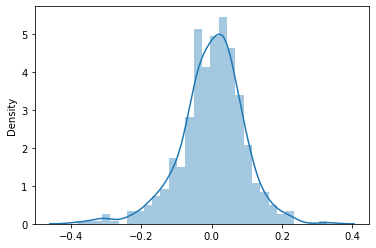

In [92]:
sns.distplot(res)
plt.show()

the model shows very good picture of the **normally distributed residuals with mean 0 and standard deviation sigma.**

-  **Checking for Homoscedasticity**

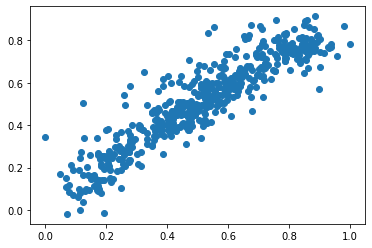

In [93]:
plt.scatter(y_train, y_train_pred)
plt.show()

the model shows **almost a constant variance of the residual terms.**

## Testing the model in the test set (Unseen data)

In [94]:
df_test[num_var_scale] = scaler.transform(df_test[num_var_scale])

In [95]:
df_test.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tue,weekday_Wed,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.479452,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.319635,0.027397
std,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.500722,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.467403,0.163612
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


-  The **Min and Max** values are **around 0 and 1** respectively, the **reason** behind this is the **MinMaxScaler have scaled them using the Min and Max value it learned from the training data**.

##### Preparing test data

In [96]:
X_test = df_test.drop("cnt",axis = 1)
y_test = df_test["cnt"]

In [97]:
X_test = X_test[X_train.columns]

In [98]:
X_test.head()

,holiday,temp,hum,windspeed,season_summer,season_winter,yr_2019,mnth_jul,mnth_sep,weathersit_2,weathersit_3
184,1,0.831783,0.657364,0.084219,0,0,0,1,0,1,0
535,0,0.901354,0.610133,0.153728,1,0,1,0,0,0,0
299,0,0.511964,0.837699,0.334206,0,1,0,0,0,1,0
221,0,0.881625,0.437098,0.339570,0,0,0,0,0,0,0
152,0,0.817246,0.314298,0.537414,1,0,0,0,0,0,0


In [99]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [100]:
X_test_sm = sm.add_constant(X_test)

In [101]:
X_test_sm.head()

,const,holiday,temp,hum,windspeed,season_summer,season_winter,yr_2019,mnth_jul,mnth_sep,weathersit_2,weathersit_3
184,1.0,1,0.831783,0.657364,0.084219,0,0,0,1,0,1,0
535,1.0,0,0.901354,0.610133,0.153728,1,0,1,0,0,0,0
299,1.0,0,0.511964,0.837699,0.334206,0,1,0,0,0,1,0
221,1.0,0,0.881625,0.437098,0.339570,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.314298,0.537414,1,0,0,0,0,0,0


### predicting y_test values

In [102]:
y_test_pred = lr_sm5.predict(X_test_sm)

In [103]:
y_test_pred.head()

184    0.388522
535    0.933564
299    0.399768
221    0.608664
152    0.636827
dtype: float64

In [104]:
test_res = y_test - y_test_pred
test_res.head()

184    0.304184
535   -0.221530
299   -0.096386
221   -0.061264
152   -0.067798
dtype: float64

## Model validation

**R2 value of test data**

In [105]:
test_R2 = r2_score(y_true = y_test, y_pred = y_test_pred)
print("test_R2 value =",round(test_R2,3))

test_R2 value = 0.804


**R2 value of train data**

In [106]:
train_R2 = r2_score(y_true = y_train, y_pred = y_train_pred)
print("train_R2 value =",round(train_R2,3))

train_R2 value = 0.84


**adjusted R2 value of test data**

In [107]:
# N -> number of rows in the dataset
N = X_test_sm.shape[0]

# p -> number of columns in the dataset
p = X_test_sm.shape[1]

# formula for adjusted R2

adjusted_test_R2 = 1 - ((1-test_R2)*(N-1)/(N-p-1))
print("adjusted_test_R2 value =",round(adjusted_test_R2,3))

adjusted_test_R2 value = 0.793


**adhjusted R2 value of train data**

In [108]:
# N -> number of rows in the dataset
N = X_train_sm.shape[0]

# p -> number of columns in the dataset
p = X_train_sm.shape[1]

# formula for adjusted R2

adjusted_train_R2 = 1 - ((1-train_R2)*(N-1)/(N-p-1))
print("adjusted_train_R2 value =",round(adjusted_train_R2,3))

adjusted_train_R2 value = 0.836


**The model generalizes the unseen test data very well**

# Final interpretation of the model

-  These are the driving factors of the target variable, So for the business to boom back they have to concentrate on these key driving factors.

**cnt = 0.2265 X const - 0.0994 X holiday + 0.5982 X temp - 0.1850 X hum - 0.1895 X windspeed + 0.0815 X season_summer + 0.1358 X season_winter + 0.2284 X yr_2019 - 0.0481 X mnth_jul + 0.0959 X mnth_sep - 0.0505 X weathersit_2 - 0.2322 X weathersit_3**

### Top driving factors of the business

##### variable "temp"

-  If the temperature increases by 1 unit then the count of the bike sharing will Increase 0.59 units

##### variable "weathersit_3"

-  If the weathersit_3 increases by 1 unit then the count of the bike sharing will Decrease 0.23 units